# Modelo de inteligencia artificial para adulto mayor

---



Desarrollo de modelo de inteligencia artifical para la predicción de la satisfacción de vida en un entero entre 1 y 10

## Objetivo

- Desarrollar un modelo de inteligencia artifical para la predicción de la satisfacción de la persona con la vida.

- Evaluar los diferentes tipos de modelos.

- Seleccionar el mejor tipo de modelo de inteligencia artificial según los puntajes en entrenamiento y testeo de estos.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sklearn.preprocessing as preproc
import numpy as np
import pandas as pd
import cv2
import json
import seaborn as sns
import os
from google.colab import drive
import statsmodels.api as sm
import itertools

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import pickle

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/Shared drives/Tecnicas de aprendizaje estadistico/Trabajo 1")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


## Lectura de datos organizados

Se leen los datos que contienen las caracteristicas creadas en la sección de **ingenieria de caracteristicas**.

In [ ]:
data = pd.read_csv('datasets/formatted_data.csv', low_memory=False)
df = data.copy()  

In [ ]:
# Abrir archivo JSON con los metadatos

with open('datasets/metadata.json', 'r') as outfile:
  metadata =  json.loads(json.load(outfile))

## Caracteristicas seleccionadas

In [ ]:
caracteristicas_uno = ["tiene_servicios_basicos", "calidad_sector", "calidad_vivienda", "años_cumplidos", "sexo_n", "estado_civil_n", "campesino"]
caracteristicas_dos = ["tiene_servicios_basicos", "calidad_sector", "calidad_vivienda", "años_cumplidos", "sexo_n", "estado_civil_n", "campesino", "estado_de_salud", "actualmente_trabaja", "satisfaccion_tiempo_libre"]
caracteristicas_tres = ["tiene_servicios_basicos", "calidad_sector", "calidad_vivienda", "años_cumplidos", "sexo_n", "estado_civil_n", "campesino", "estado_de_salud", "actualmente_trabaja", "satisfaccion_tiempo_libre", "ingresos_mensuales", "cantidad_personas_hogar"]

Las caracteristicas elegidas para predecir la satisfacción de vida en el caso de abuelos, son las que se observan en la linea de codigo anterior. Estas caracteristicas fueron seleccionadas con los analistas basandose en que tan facil puede ser su respuesta para una persona y estudios previos que se mostraran en el reporte.

## Valor optimo de K
Ya que se va a desarrollar un modelo de KNN, se busca mediante la tecnica de validación cruzada el numero optimo de K Vecinos que tenga un valor bajo de MSE y que no aumente significativamente cuando se añaden mas vecinos. Esto se probara para el conjunto de **caracteristicas_tres**. Tambien se probo con los demas conjuntos, pero como la linea de codigo que viene a continuación tiene un tiempo de ejecución elevado, solo se deja con este conjunto de caracteristicas.

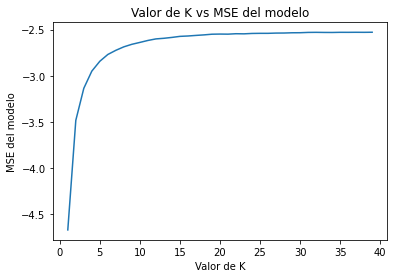

In [ ]:
X = df[df.años_cumplidos >= 60][caracteristicas_tres]
y = df[df.años_cumplidos >= 60]["satisfaccion_vida"]

%matplotlib inline
# Escoger un k entre 1 y 40
k_range = range(1, 40)
k_scores = []
# Iteración entre diferentes valores de K
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())
# Grafica para visualizar los K
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K')
plt.ylabel('MSE del modelo')
plt.title("Valor de K vs MSE del modelo")
plt.show()

De la grafica anterior se puede ver que cerca de K=15 el MSE tiende a establizarse, por lo que elegir mas de esta cantidad de vecinos no implicaria una mejore en el MSE del modelo de KNN.

## Implementación de modelos

Se implementan tres modelos.

*   **KNN para regresión**
*   **Regresión lineal**
*   **Arbol de decisión**

Los tres modelos seleccionados se prueban con los tres conjuntos de caracteristicas definidos previamente. A cada uno de estos modelos se le calcula el MSE en entrenamiento, en testeo y tambien se hace la diferencia entre ambos errores. Esta diferencia sirve para ver si el modelo sufre de un sobre ajuste o sub ajuste, en cuyo caso puede que no sea optimo.


In [ ]:
caracteristicas = [caracteristicas_uno, caracteristicas_dos, caracteristicas_tres]

for index_, i in enumerate(caracteristicas):

  X = df[df.años_cumplidos >= 60][i]
  y = df[df.años_cumplidos >= 60]["satisfaccion_vida"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
  print(f"Las caracteristicas de estos modelos son: {i}\n")

  # KNN
  print("### KNN ###")
  knn = KNeighborsRegressor(n_neighbors=15).fit(X_train, y_train)

  ypredtrain = knn.predict(X_train)
  error_training = mean_squared_error(y_train, ypredtrain)
  print(f'El MSE en entrenamiento es: {error_training}')

  ypredtest = knn.predict(X_test)
  error_testing = mean_squared_error(y_test, ypredtest)
  print(f'El MSE en testeo es: {error_testing}')
  print(f'La diferencia absoluta de ambos errores es: {abs(error_training-error_testing)}\n')

  # Regresion
  
  print("### Regresión lineal ###")
  reg = LinearRegression().fit(X_train, y_train)

  ypredtrain = reg.predict(X_train)
  error_training = mean_squared_error(y_train, ypredtrain)
  print(f'El MSE en entrenamiento es: {error_training}')

  ypredtest = reg.predict(X_test)
  error_testing = mean_squared_error(y_test, ypredtest)
  print(f'El MSE en testeo es: {error_testing}')
  print(f'La diferencia absoluta de ambos errores es: {abs(error_training-error_testing)}\n')

  # Arboles de decisión
  print("### Arboles de decisión para regresión ###")
  tree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

  ypredtrain = tree.predict(X_train)
  error_training = mean_squared_error(y_train, ypredtrain)
  print(f'El MSE en entrenamiento es: {error_training}')

  ypredtest = tree.predict(X_test)
  error_testing = mean_squared_error(y_test, ypredtest)
  print(f'El MSE en testeo es: {error_testing}')
  print(f'La diferencia absoluta de ambos errores es: {abs(error_training-error_testing)}\n\n')
  pickle.dump(reg, open(f'Repo/lm-old-carac{index_}-2022-28-04-07-24', 'wb'))

Las caracteristicas de estos modelos son: ['tiene_servicios_basicos', 'calidad_sector', 'calidad_vivienda', 'años_cumplidos', 'sexo_n', 'estado_civil_n', 'campesino']

### KNN ###
El MSE en entrenamiento es: 3.3463630914005855
El MSE en testeo es: 3.6192695138134883
La diferencia absoluta de ambos errores es: 0.27290642241290275

### Regresión lineal ###
El MSE en entrenamiento es: 3.4377162527020446
El MSE en testeo es: 3.4460359280118555
La diferencia absoluta de ambos errores es: 0.008319675309810926

### Arboles de decisión para regresión ###
El MSE en entrenamiento es: 3.030497125176802
El MSE en testeo es: 3.8523984304450605
La diferencia absoluta de ambos errores es: 0.8219013052682587


Las caracteristicas de estos modelos son: ['tiene_servicios_basicos', 'calidad_sector', 'calidad_vivienda', 'años_cumplidos', 'sexo_n', 'estado_civil_n', 'campesino', 'estado_de_salud', 'actualmente_trabaja', 'satisfaccion_tiempo_libre']

### KNN ###
El MSE en entrenamiento es: 2.163372354744211